In [ ]:
c

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [4]:
import cupy as cp

In [5]:
PROJECT_PATH = '../'
BLUE_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_Blue_R2300.h5"
NIR_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_NIR_R4300.h5"
sys.path.insert(0, PROJECT_PATH)

In [137]:
def collect_flux(nSample=10000, Rs=None):
    fluxs=[]
    pvals=[]
    lbls =[]
    if Rs is None: Rs = ["M31G", "MWW", "MWC", "BHB", "RHB","DGG"]
    for ii, R in enumerate(Rs):
        RBF_PATH = f"/scratch/ceph/swei20/data/dnn/{R}/rbf_RedM_R5000_10k.h5"
        with h5py.File(RBF_PATH, 'r') as f:
            flux0 = f['normflux'][()]
            pval0 = f['pval'][()]
            wave0 = f['wave'][()]
        fluxs.append(flux0[:nSample])
        pvals.append(pval0[:nSample])
        lbls.append(np.zeros(len(flux0)) + ii)
    fluxs = np.vstack(fluxs)
    pvals = np.vstack(pvals)
    lbls = np.hstack(lbls)
    lbln = [Rs[int(lbls[i])] for i in range(len(lbls))]    
    print(fluxs.shape, pvals.shape, lbls.shape)
    return fluxs, pvals, lbls, lbln, wave0

In [138]:
fluxs, pvals, lbls, lbln, wave0 = collect_flux()

(60000, 2204) (60000, 5) (60000,)


In [61]:
def resampleWave(wave,step=5):
    #-----------------------------------------------------
    # resample the wavelengths by a factor step
    #-----------------------------------------------------
    w = np.cumsum(np.log(wave))
    b = list(range(1,wave.shape[0],step))
    db = np.diff(w[b])
    dd = (db/step)
    return np.exp(dd)
def resampleSpec(spec, step=5):
    #-----------------------------------------------------
    # resample the spectrum by a factor step
    #-----------------------------------------------------
    c = np.cumsum(spec)
    b = list(range(1,spec.shape[0],step))
    db = np.diff(c[b])
    dd = (db/step)
    return dd
def resampleSpecs(specs, wave,step=5):
    out = np.zeros((len(specs), len(wave)))
    for ii, spec in enumerate(specs):
        out[ii] = resampleSpec(spec, step=step)
    return out

In [55]:
for flux in fluxs:
    print(flux.shape)
    break

(2204,)


In [52]:
waveMRL = resampleWave(wave0, step=10)

In [53]:
waveMRL.shape

(220,)

In [78]:
fluxsL = resampleSpecs(fluxs, waveMRL, step=10)

In [224]:
pvals[0]

array([-2.18132136e+00,  4.24150525e+03,  1.91449020e+00, -4.54606864e-01,
        2.77373061e-01])

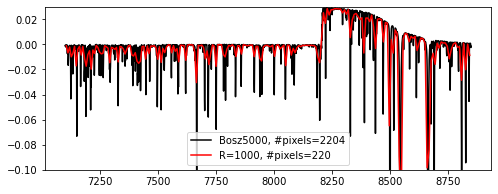

In [77]:
plt.figure(figsize=(8,3))
plt.plot(wave0, fluxs[0], c='k', label="Bosz5000, #pixels=2204")
plt.plot(waveMRL, fluxsL[0], c='r', label="R=1000, #pixels=220")
plt.ylim(-0.1, 0.03)
plt.legend()

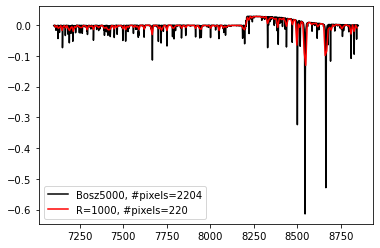

In [72]:
plt.plot(wave0, fluxs[0], c='k', label="Bosz5000, #pixels=2204")
plt.plot(waveMRL, fluxsL[0], c='r', label="R=1000, #pixels=220")
plt.legend()

In [ ]:
from lv.base.basePCA import PCA

# RML

In [366]:
W="RML"

In [367]:
DATA_PATH = f"/scratch/ceph/szalay/swei20/AE/norm_flux_{W}_R1000.h5"
with h5py.File(DATA_PATH, 'r') as f:
    flux = f['flux'][()]
    para = f['para'][()]
    wave = f['wave'][()]

In [368]:
p = PCA()
p.prepare_data(flux, wave, para, W=W)
p.prepare_svd(top=50, save=1)

 67%|██████▋   | 4/6 [00:00<00:00, 32.87it/s]

# M flux: 7689, wave RML: (221,) 
# W flux: 6480, wave RML: (221,) 
# C flux: 3780, wave RML: (221,) 
# B flux: 3300, wave RML: (221,) 
# R flux: 2100, wave RML: (221,) 
# G flux: 9972, wave RML: (221,) 


100%|██████████| 6/6 [00:00<00:00, 27.54it/s]

/scratch/ceph/swei20/data/dnn/pc/bosz_RML_R1000.h5


# BL

In [360]:
W="BL"

In [361]:
DATA_PATH = f"/scratch/ceph/szalay/swei20/AE/norm_flux_{W}_R1000.h5"
with h5py.File(DATA_PATH, 'r') as f:
    flux = f['flux'][()]
    para = f['para'][()]
    wave = f['wave'][()]

In [362]:
p = PCA()
p.prepare_data(flux, wave, para, W=W)
p.prepare_svd(top=50, save=1)

  0%|          | 0/6 [00:00<?, ?it/s]

# M flux: 7689, wave BL: (537,) 
# W flux: 6480, wave BL: (537,) 
# C flux: 3780, wave BL: (537,) 
# B flux: 3300, wave BL: (537,) 
# R flux: 2100, wave BL: (537,) 
# G flux: 9972, wave BL: (537,) 


100%|██████████| 6/6 [00:00<00:00,  7.41it/s]

/scratch/ceph/swei20/data/dnn/pc/bosz_BL_R1000.h5


# NL

In [363]:
W="NL"

In [364]:
DATA_PATH = f"/scratch/ceph/szalay/swei20/AE/norm_flux_{W}_R1000.h5"
with h5py.File(DATA_PATH, 'r') as f:
    flux = f['flux'][()]
    para = f['para'][()]
    wave = f['wave'][()]

In [365]:
p = PCA()
p.prepare_data(flux, wave, para, W=W)
p.prepare_svd(top=50, save=1)

  0%|          | 0/6 [00:00<?, ?it/s]

# M flux: 7689, wave NL: (293,) 
# W flux: 6480, wave NL: (293,) 
# C flux: 3780, wave NL: (293,) 
# B flux: 3300, wave NL: (293,) 
# R flux: 2100, wave NL: (293,) 
# G flux: 9972, wave NL: (293,) 


100%|██████████| 6/6 [00:00<00:00, 20.48it/s]

/scratch/ceph/swei20/data/dnn/pc/bosz_NL_R1000.h5


In [ ]:
p.prepare_rf(cut=12)

(2100, 50) (2100, 5)


KeyboardInterrupt: 

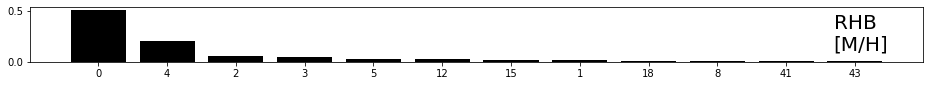

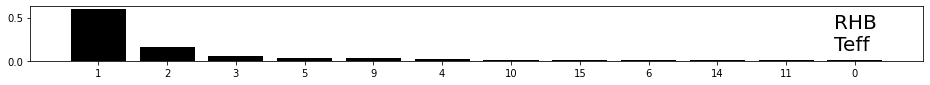

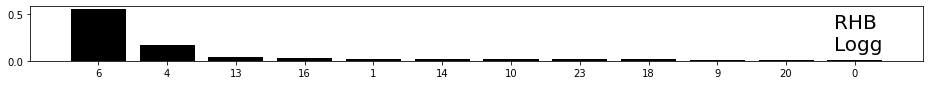

In [341]:
p.get_rfdx(Rgn)

(0.0, 0.05)

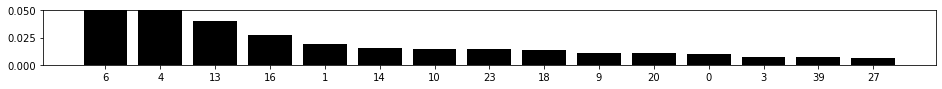

In [335]:
p.barplot_rf(fi)
plt.ylim(0,0.05)

In [338]:
20//3

6

In [313]:
dfc = pd.DataFrame(data=p.nPara[Rgn], columns=p.pnames)

In [314]:
for i in range(12):
    dfc[f"p{i}"] = pcFluxRF[:, i]

In [316]:
dfc

,[M/H],Teff,Logg,[C/M],[a/M],p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,-1.0,5000.0,2.0,-0.50,-0.25,-0.404217,-0.015937,0.054726,0.055777,-0.004807,-0.002562,0.008045,0.008262,0.000742,-0.000907,0.001662,0.002563
1,-1.0,5000.0,2.0,-0.50,0.00,-0.473433,-0.006700,0.077114,0.049359,0.003200,-0.003293,0.005568,0.007160,-0.000117,-0.000914,0.003068,0.002430
2,-1.0,5000.0,2.0,-0.50,0.25,-0.548182,-0.000005,0.097780,0.036600,0.011233,-0.006262,0.003368,0.006400,-0.001589,-0.001030,0.003631,0.002033
3,-1.0,5000.0,2.0,-0.50,0.50,-0.625410,0.002846,0.115734,0.017590,0.018610,-0.010965,0.000551,0.005345,-0.002272,-0.002243,0.003377,0.001602
4,-1.0,5000.0,2.0,-0.25,-0.25,-0.406926,-0.019078,0.052125,0.056266,-0.002374,-0.001414,0.007321,0.007890,0.000993,-0.001224,0.001309,0.002295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.0,6500.0,3.0,0.25,0.50,-0.907977,0.088605,-0.056738,-0.069789,-0.028566,0.031169,-0.041495,0.013847,0.003614,-0.001729,0.003035,0.003521
2096,0.0,6500.0,3.0,0.50,-0.25,-0.608065,0.086334,-0.121500,0.013449,-0.052026,0.034012,-0.009811,-0.000339,-0.004421,-0.000014,0.003477,-0.001197
2097,0.0,6500.0,3.0,0.50,0.00,-0.690232,0.089961,-0.100994,-0.001206,-0.045151,0.038716,-0.018082,0.002108,-0.001503,-0.000486,0.003627,-0.000054
2098,0.0,6500.0,3.0,0.50,0.25,-0.791572,0.090561,-0.081622,-0.027977,-0.038482,0.041936,-0.028545,0.006681,0.000985,-0.000564,0.004213,0.001917


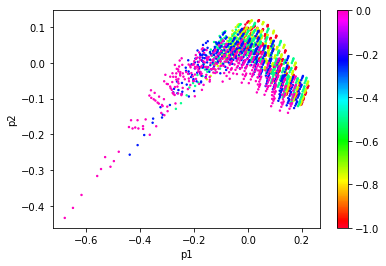

In [324]:
idx, a,b = 0, "p1", "p2"

plt.scatter(dfc[a], dfc[b], c=dfc[p.pnames[idx]].values, cmap=p.color[idx],s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

In [99]:
from lv.base.dataloader_c import DataLoader

In [100]:
ds = DataLoader()

In [101]:
ds.prepare_data_custom("RMLL", fluxsL, waveMRL, pvals, lbl=lbln)

(50000, 220) (220,) (50000, 5)


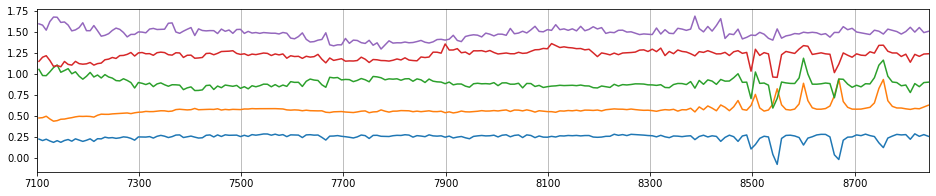

In [102]:
ds.init_pca()

# Get informative lines

In [105]:
ds.npcaFlux.shape

(50000, 50)

In [109]:
Tfi = ds.get_rf(ds.npcaFlux, ds.para[:, 1])

In [110]:
Lfi = ds.get_rf(ds.npcaFlux, ds.para[:, 2])

In [117]:
Ffi = ds.get_rf(ds.npcaFlux, ds.para[:, 0])

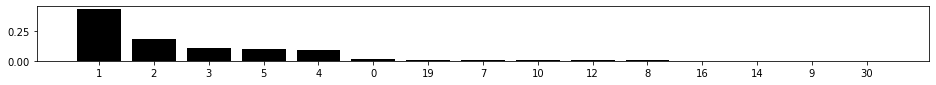

In [188]:
ds.barplot_rf(Tfi)
# plt.ylim(0,0.02)

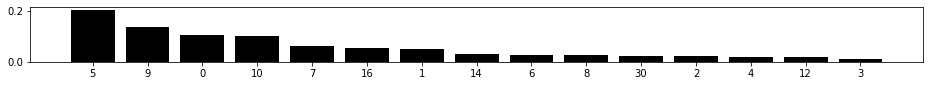

In [189]:
ds.barplot_rf(Lfi)
# plt.ylim(0,0.02)

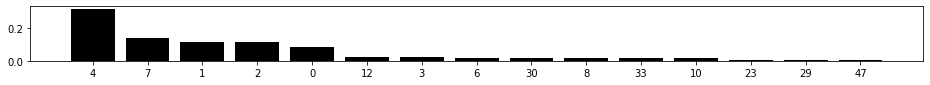

In [190]:
ds.barplot_rf(Ffi)
# plt.ylim(0,0.02)

In [227]:
from lv.constants import Constants as c

In [228]:
c.Ws

{'Blue': [3800, 6500, 2300],
 'RedL': [6300, 9700, 3000],
 'RedM': [7100, 8850, 5000],
 'NIR': [9400, 12600, 4300],
 'BL': [3800, 6500, 1000],
 'RML': [7100, 8850, 1000],
 'NL': [9400, 12600, 1000]}

In [132]:
rfdx = [1,2,3,5,4,0,9,10,7,16,14,6,8,30,19,12]

In [133]:
len(rfdx)

16

In [170]:
dfc = np.copy(ds.dfpara)

In [173]:
dfc[:,:3]

array([[-2.18132136e+00,  4.24150525e+03,  1.91449020e+00],
       [-1.04857990e+00,  3.78831545e+03,  6.37767527e-02],
       [-8.94329601e-01,  4.07415664e+03,  5.32601149e-01],
       ...,
       [-3.37862595e-01,  5.21037768e+03,  2.05732380e+00],
       [-3.31924374e-03,  5.64819280e+03,  2.60992719e+00],
       [-7.05458665e-01,  5.88863950e+03,  2.27976212e+00]])

In [174]:
dfc = pd.DataFrame(dfc[:,:3], columns=["F","T","L"])

In [176]:
dfc

,F,T,L
0,-2.181321,4241.505253,1.914490
1,-1.048580,3788.315452,0.063777
2,-0.894330,4074.156645,0.532601
3,-1.369839,3756.060329,0.479334
4,-2.207059,4486.324792,0.368539
...,...,...,...
49995,-0.906073,5147.447645,2.340813
49996,-0.076290,5079.817543,2.920920
49997,-0.337863,5210.377676,2.057324
49998,-0.003319,5648.192797,2.609927


In [177]:
for dx in rfdx:
    dfc[f"p{dx}"] = ds.npcaFlux[:,dx]

In [178]:
dfc

,F,T,L,p1,p2,p3,p5,p4,p0,p9,p10,p7,p16,p14,p6,p8,p30,p19,p12
0,-2.181321,4241.505253,1.914490,0.043723,-0.086897,-0.087617,0.007957,0.000999,-0.188692,0.001010,0.012771,-0.031451,0.002137,0.006220,-0.010772,0.007168,-0.002217,0.008758,-0.015656
1,-1.048580,3788.315452,0.063777,-0.092076,-0.203287,-0.168321,-0.050151,0.105644,-0.931472,0.005193,0.053459,0.010931,0.008799,-0.016493,0.016360,0.063038,0.000511,-0.003405,0.015539
2,-0.894330,4074.156645,0.532601,-0.057969,-0.207826,-0.074044,-0.046355,0.060837,-0.714386,-0.025163,0.025143,0.001094,0.001597,-0.001092,0.062196,0.016905,-0.000323,0.006861,0.017006
3,-1.369839,3756.060329,0.479334,-0.462788,-0.202974,0.457372,-0.047843,0.078887,-1.108656,-0.086412,-0.026832,-0.090700,0.005734,-0.000724,-0.017204,-0.012414,0.002194,0.005018,0.026906
4,-2.207059,4486.324792,0.368539,0.087344,-0.109296,-0.102598,-0.009437,-0.001093,-0.237538,0.010106,0.011635,-0.036509,0.005719,-0.002314,-0.046496,0.012951,-0.003956,-0.001984,-0.002720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.906073,5147.447645,2.340813,0.075827,-0.141019,-0.099213,0.001091,-0.012149,-0.411787,-0.001504,0.002207,-0.012741,0.002799,-0.003695,-0.016634,-0.009288,0.000376,-0.005029,0.001328
49996,-0.076290,5079.817543,2.920920,-0.060370,-0.172913,-0.020097,-0.002386,-0.002030,-0.647319,-0.019297,-0.005063,0.038452,-0.001226,-0.000743,0.086979,-0.039427,0.000231,0.003338,-0.010799
49997,-0.337863,5210.377676,2.057324,0.074859,-0.220080,-0.123009,-0.001686,-0.030628,-0.723232,-0.009446,-0.004998,0.029483,0.000555,0.005011,-0.018241,-0.003568,0.000931,-0.002525,0.007191
49998,-0.003319,5648.192797,2.609927,0.078279,-0.146982,-0.085988,0.017816,-0.027668,-0.604602,-0.014179,0.008166,0.039607,-0.002373,0.002529,0.029343,-0.038050,-0.000156,0.001004,-0.004757


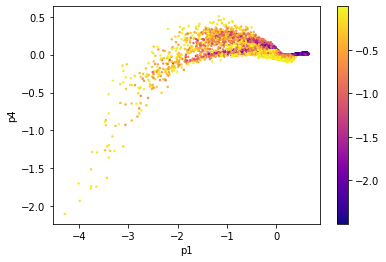

In [221]:
a,b = "p1", "p4"
plt.scatter(dfc[a], dfc[b], c=dfc["F"].values, cmap="plasma",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

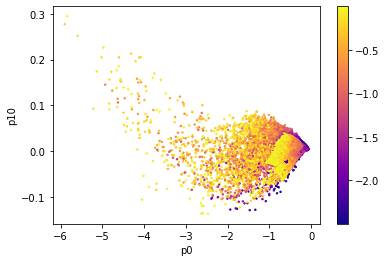

In [214]:
a,b = "p0", "p10"
plt.scatter(dfc[a], dfc[b], c=dfc["F"].values, cmap="plasma",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

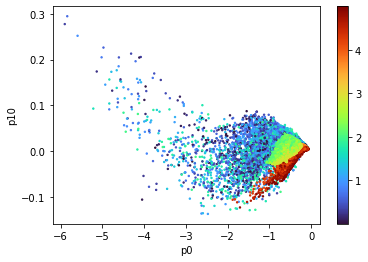

In [213]:
a,b = "p0", "p10"
plt.scatter(dfc[a], dfc[b], c=dfc["L"].values, cmap="turbo",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

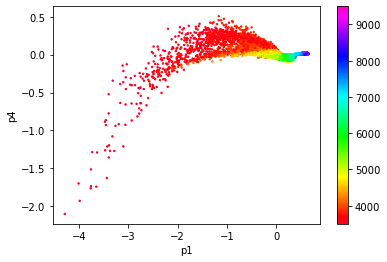

In [195]:
a,b = "p1", "p4"
plt.scatter(dfc[a], dfc[b], c=dfc["T"].values, cmap="gist_rainbow",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

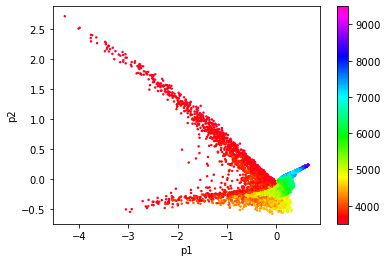

In [187]:
a,b = "p1", "p2"
plt.scatter(dfc[a], dfc[b], c=dfc["T"].values, cmap="gist_rainbow",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/minicond

KeyboardInterrupt: 

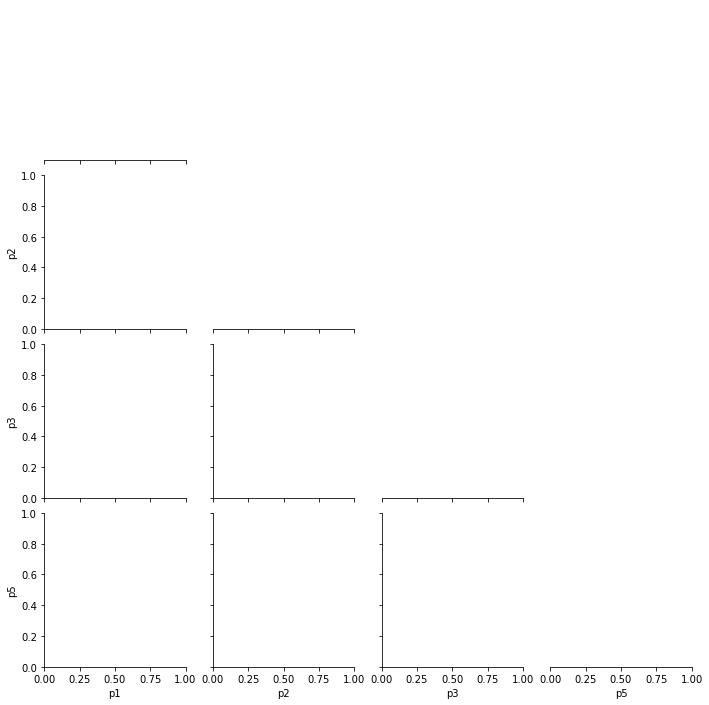

In [181]:
sns.pairplot(dfc,
    x_vars=["p1","p2","p3","p5"],
    y_vars=["p1","p2","p3","p5"],
    hue="T",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="gist_rainbow",
    corner=True)

In [134]:
FluxC = ds.npcaFlux[:, rfdx]

In [135]:
FluxC.shape

(50000, 16)

In [139]:
ds.para.shape

(50000, 5)

In [ ]:
w="R"

In [143]:
ds.dfpara.describe()

,F,T,L,C,O
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-1.150155,6000.983035,2.947381,-0.124016,0.125639
std,0.711340,1444.441913,1.347229,0.358663,0.215864
min,-2.499925,3500.010426,0.000149,-0.749866,-0.249938
25%,-1.765675,4938.692823,2.123002,-0.433585,-0.060618
50%,-1.073839,5775.406535,2.746480,-0.124618,0.125388
75%,-0.526596,6999.771019,4.247523,0.184885,0.311794
max,-0.000140,9499.984383,4.999823,0.499822,0.499889


In [145]:
bnds=np.array([[-2.5,0.],[3500,9500], [0,5],[-0.75, 0.5],[-0.25, 0.5]])

In [160]:
np.diff(bnds).T[0]

array([2.50e+00, 6.00e+03, 5.00e+00, 1.25e+00, 7.50e-01])

In [165]:
ds.normpara = np.divide((ds.para- bnds[:,0] ), np.diff(bnds).T[0])

In [167]:
def save_PCA(flux, pval, pnorm, w, PATH):
    with h5py.File(PATH, 'w') as f:
        f.create_dataset(f'flux{w}', data = flux, shape=flux.shape)
        f.create_dataset('pval', data = pval, shape=pval.shape)
        f.create_dataset('pnorm', data = pnorm, shape=pnorm.shape)


In [169]:
PATH = "/scratch/ceph/swei20/data/dnn/LL/pca_5k.h5"

In [222]:
save_PCA(FluxC, ds.para, ds.normpara, "R", PATH)